In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, roc_curve, classification_report


In [2]:
# 📥 Load Dataset
df = pd.read_csv("PIMA.csv")


In [3]:
# 🔍 Basic Data Inspection
print("📐 Shape of Dataset:", df.shape)
print("📌 Columns:", df.columns.tolist())
print("🔼 First 5 rows:\n", df.head())
print("🔽 Last 5 rows:\n", df.tail())

# ⚠️ Replace 0s with NaN in key medical columns
cols_with_zero_as_nan = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero_as_nan] = df[cols_with_zero_as_nan].replace(0, pd.NA)

# 🧼 Check & Impute Missing Values
print("🧮 Missing values before imputation:\n", df.isnull().sum())
imputer = SimpleImputer(strategy="mean")
df[cols_with_zero_as_nan] = imputer.fit_transform(df[cols_with_zero_as_nan])


📐 Shape of Dataset: (768, 9)
📌 Columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
🔼 First 5 rows:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      NaN  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
🔽 Last 5 rows:
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10    101.0      

⚠️ Outliers Detected:
 Pregnancies                   4
Glucose                       0
BloodPressure                14
SkinThickness                87
Insulin                     164
BMI                           8
DiabetesPedigreeFunction     29
Age                           9
Outcome                       0
dtype: int64


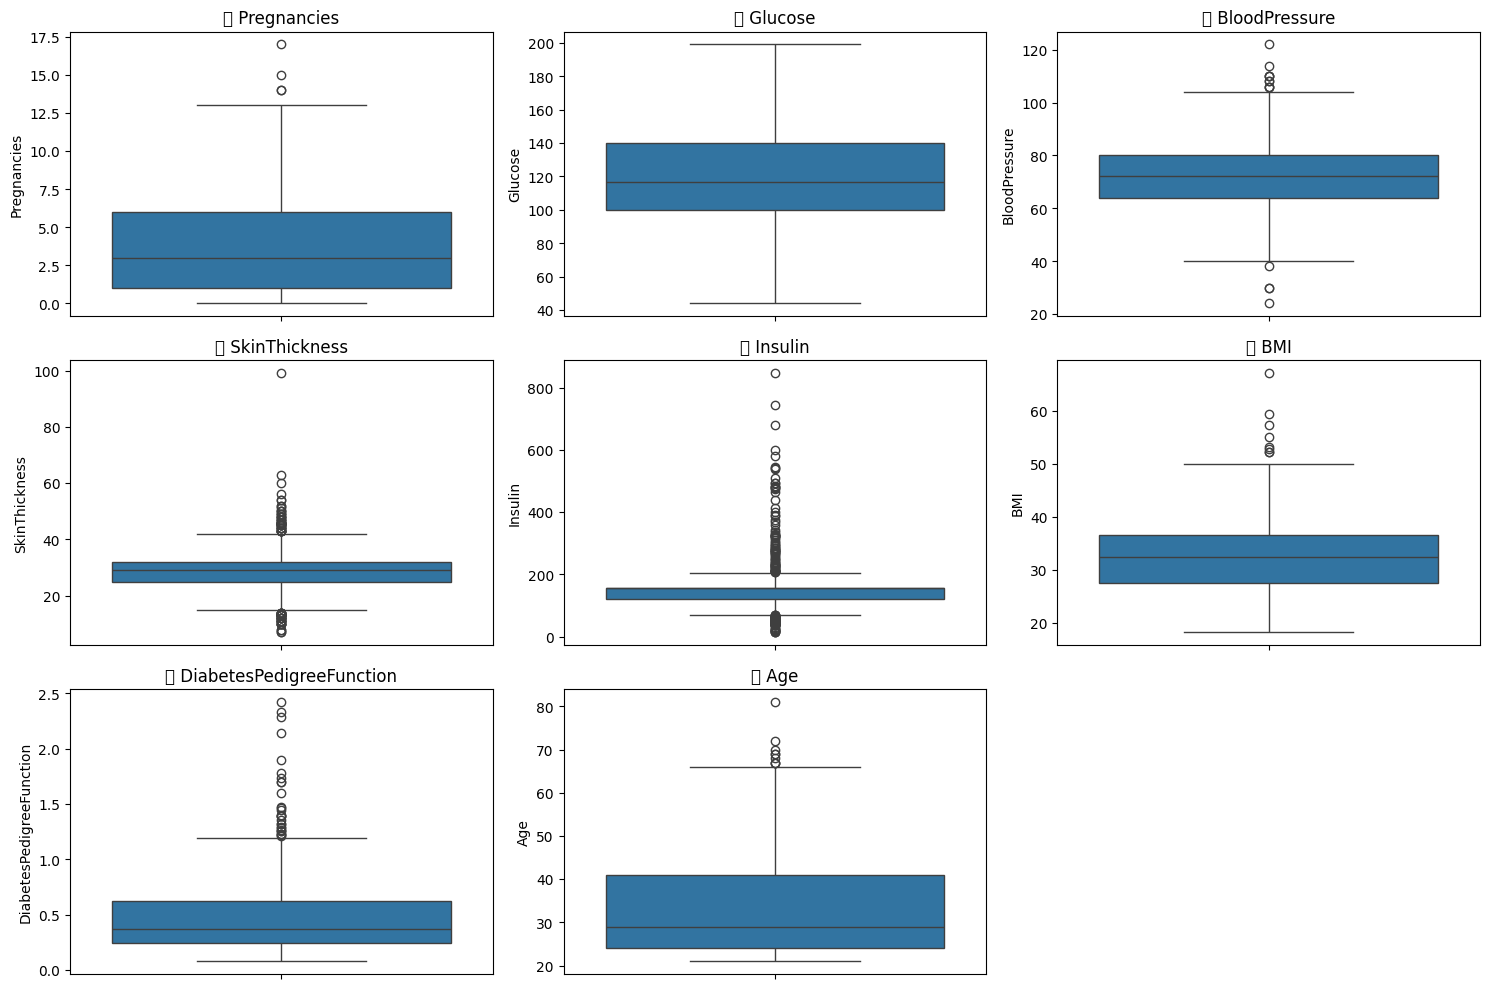

In [6]:
# 📉 Outlier Detection using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print("⚠️ Outliers Detected:\n", outliers)

# 📊 Boxplots to Visualize Outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'📦 {col}')
plt.tight_layout()
plt.show()

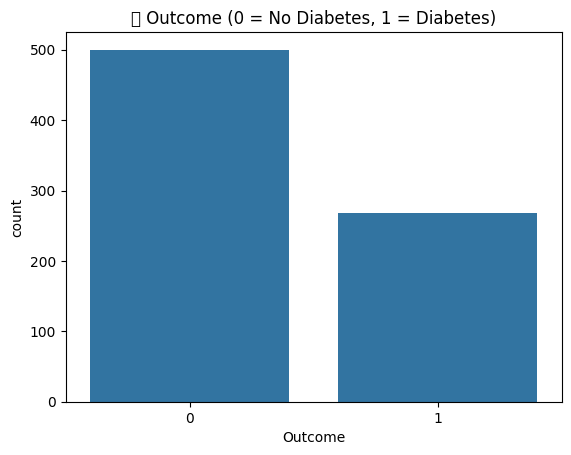

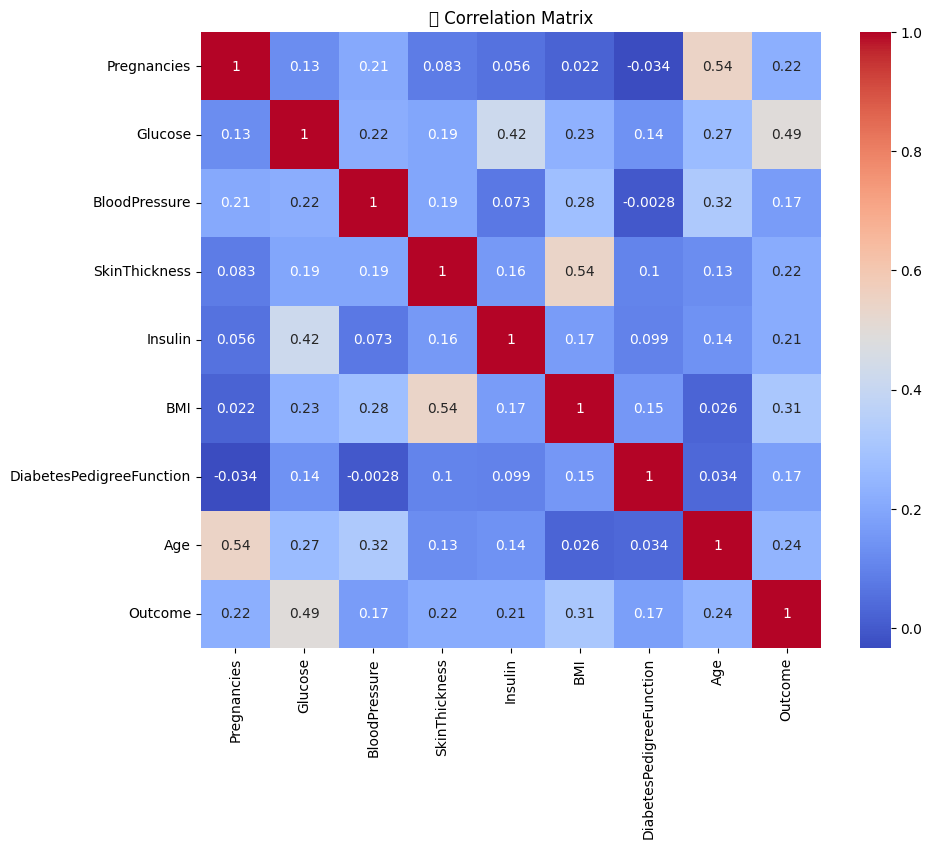

In [7]:
# 📈 EDA: Outcome Distribution
sns.countplot(x='Outcome', data=df)
plt.title("📊 Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.show()

# 🔁 Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("🔗 Correlation Matrix")
plt.show()

In [8]:
# 🧪 Feature and Label Split
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# 📏 Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🎲 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [9]:
# 🤖 ML Models
models = {
    "Gradient Boosting 🌲": GradientBoostingClassifier(),
    "Support Vector Machine 💠": SVC(probability=True),
    "Neural Network 🧠": MLPClassifier(max_iter=500)
}


📝 Gradient Boosting 🌲 Report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.79        99
           1       0.62      0.69      0.66        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154

🎯 F1 Score: 0.6551724137931034
📊 AUC Score: 0.8181818181818182
📉 Confusion Matrix:
 [[76 23]
 [17 38]]

📝 Support Vector Machine 💠 Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        99
           1       0.68      0.58      0.63        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154

🎯 F1 Score: 0.6274509803921569
📊 AUC Score: 0.8102846648301193
📉 Confusion Matrix:
 [[84 15]
 [23 32]]

📝 Neural Network 🧠 Report:
              precision    recall  f1-score  

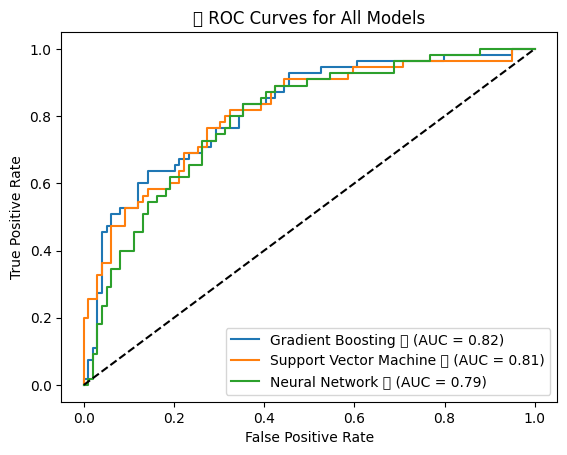

In [12]:
# 🚀 Training and Evaluation
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"\n📝 {name} Report:")
    print(classification_report(y_test, y_pred))
    print("🎯 F1 Score:", f1_score(y_test, y_pred))
    print("📊 AUC Score:", roc_auc_score(y_test, y_proba))
    print("📉 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # 🔬 ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})')
    # 🎨 Final ROC Plot
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("📈 ROC Curves for All Models")
plt.legend()
plt.show()